# ReLU and Its Variants

## 1. ReLU (Rectified Linear Unit)

### Theory
- **Formula:** `f(x) = max(0, x)`  
- **Intuition:** Passes positive inputs unchanged, zeros out negatives. Encourages sparse activation.  
- **Use Case:** Hidden layers in deep networks. Default activation in most architectures.  
- **Advantages:**  
  - Simple and fast to compute  
  - Avoids vanishing gradient for positive inputs  
  - Sparse activation → efficient computation  
- **Disadvantages:**  
  - Dying ReLU problem (neurons stuck at 0)  
  - Unbounded positive output  
- **Derivative:** `f'(x) = 1 if x > 0 else 0`

```python
import torch
import torch.nn as nn

class SimpleReLUModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleReLUModel()
x = torch.randn(32, 784)
output = model(x)
print(output.shape)  # torch.Size([32, 10])



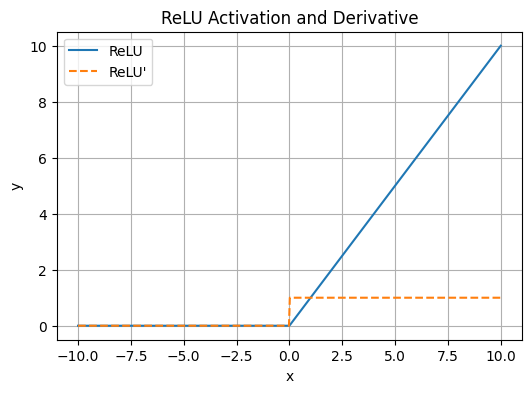

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 500)
relu = np.maximum(0, x)
relu_derivative = np.where(x > 0, 1, 0)

plt.figure(figsize=(6,4))
plt.plot(x, relu, label='ReLU')
plt.plot(x, relu_derivative, '--', label="ReLU'")
plt.title('ReLU Activation and Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Leaky ReLU

**Formula:**  
`f(x) = x if x > 0 else α*x`  (α ~ 0.01)

**Intuition:**  
Allows a small gradient for negative inputs to avoid dying neurons.

**Use Case:**  
Hidden layers where ReLU causes dying neurons.

**Advantages:**  
- Solves the dying ReLU problem  
- Maintains sparse activation  

**Disadvantages:**  
- Negative slope α needs to be predefined  

**Derivative:**  
`f'(x) = 1 if x > 0 else α`


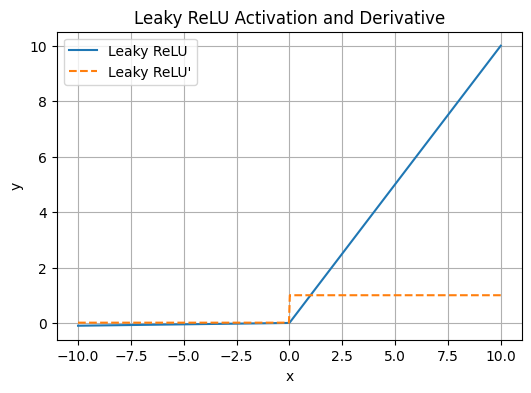

In [2]:
alpha = 0.01
leaky = np.where(x > 0, x, alpha*x)
leaky_derivative = np.where(x > 0, 1, alpha)

plt.figure(figsize=(6,4))
plt.plot(x, leaky, label='Leaky ReLU')
plt.plot(x, leaky_derivative, '--', label="Leaky ReLU'")
plt.title('Leaky ReLU Activation and Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Parametric ReLU (PReLU)

**Formula:**  
`f(x) = x if x ≥ 0 else α*x`  (α is learned during training)

**Intuition:**  
Learns the slope for negative inputs automatically, allowing the network to adapt.

**Use Case:**  
Deep networks where ReLU/Leaky ReLU fails.

**Advantages:**  
- Adaptive negative slope  
- Reduces dying neuron problem  

**Disadvantages:**  
- Slight risk of overfitting  

**Derivative:**  
`f'(x) = 1 if x ≥ 0 else α` (α is learned)

**Pytorch Example :** 
```python
class SimplePReLUNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.prelu = nn.PReLU()
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.prelu(x)
        x = self.fc2(x)
        return x

model = SimplePReLUNN()
x = torch.randn(32, 784)
output = model(x)
print(output.shape)  # torch.Size([32, 10])


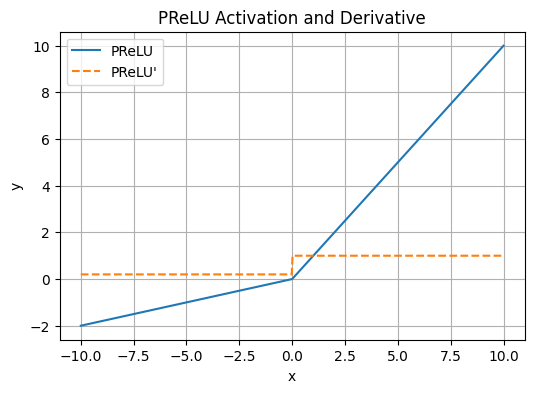

In [3]:
alpha = 0.2  # example learned slope
prelu = np.where(x >= 0, x, alpha*x)
prelu_derivative = np.where(x >= 0, 1, alpha)

plt.figure(figsize=(6,4))
plt.plot(x, prelu, label='PReLU')
plt.plot(x, prelu_derivative, '--', label="PReLU'")
plt.title('PReLU Activation and Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Exponential Linear Unit (ELU)

**Formula:**  
`f(x) = x if x ≥ 0 else α * (exp(x) - 1)`

**Intuition:**  
Smooth negative values, prevents bias shift, and helps faster convergence.

**Use Case:**  
Deep networks for faster training and better convergence.

**Advantages:**  
- Smooth for negative inputs  
- Reduces dying neuron problem  

**Disadvantages:**  
- Slower to compute than ReLU  

**Derivative:**  
`f'(x) = 1 if x ≥ 0 else f(x) + α`

**PyTorch Example:**
```python
import torch
import torch.nn as nn

# ELU activation
elu = nn.ELU(alpha=1.0)

# Example usage in a simple neural network
class SimpleELUNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.elu = nn.ELU(alpha=1.0)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.elu(x)
        x = self.fc2(x)
        return x

model = SimpleELUNN()
x = torch.randn(32, 784)
output = model(x)
print(output.shape)  # torch.Size([32, 10])


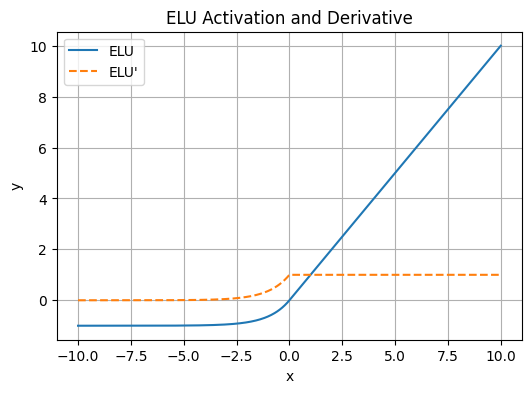

In [4]:
alpha = 1.0
elu = np.where(x >= 0, x, alpha*(np.exp(x)-1))
elu_derivative = np.where(x >= 0, 1, elu + alpha)

plt.figure(figsize=(6,4))
plt.plot(x, elu, label='ELU')
plt.plot(x, elu_derivative, '--', label="ELU'")
plt.title('ELU Activation and Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
